#  Polynomial Regression

In [6]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)



Given some feature $x$, we can create other features such as $x^2$, $x^3$ ... $x^p$, etc.

We can fit a polynomial of degree $p$ to the data:

$$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_p x^p$$

This is sometimes called a polynomial regression, but it is still a linear regression: as we are seeking a linear combination of the polynomial features. The design matrix is:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 & ... & x_1^p \\ 1 & x_2 & x_2^2 & x_2^3 & ... & x_2^p \\ ... & ... & ... & ... & ... & ... \\ 1 & x_N & x_N^2 & x_N^3 & ... & x_N^p \end{bmatrix}$$



Note that if we have $(x_0, y_0)$, $(x_1, y_1)$, ..., $(x_n, y_n)$, and the $x_i$'s are different, then there is always a polynomial of degree $n$ that passes through all the points. 
In this case, the design matrix is a square invertible matrix, and therefore $X\beta = y$ has a unique solution.
This is called interpolation.


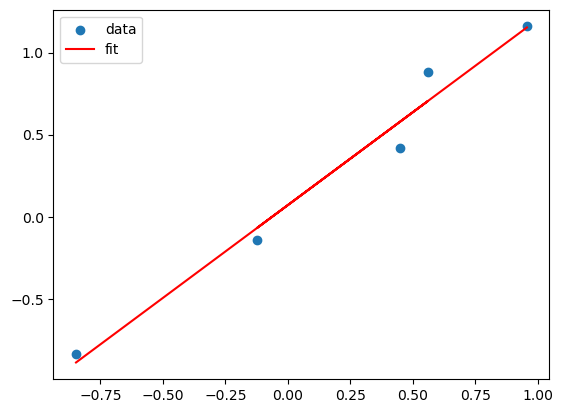

In [7]:
# Suppos the true model is a linear model of x

N = 5
X = np.random.uniform(-1,1,N)
Y = X + np.random.normal(0,0.1,N)

X = X.reshape(-1,1)
lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(X,Y) 



plt.scatter(X,Y)
plt.plot(X, lreg_sklearn.predict(X), color='red')
plt.legend(['data', 'fit'])


[-1.1329286   6.40789176  3.50868941 -7.55811971] -0.3673693141494301


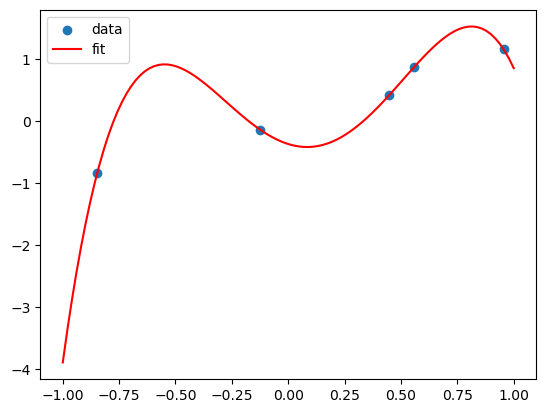

In [8]:
X_poly = np.hstack((X,X**2,X**3,X**4))
lreg_sklearn.fit(X_poly,Y) 
lreg_sklearn.score(X_poly,Y)


print(lreg_sklearn.coef_, lreg_sklearn.intercept_)
x_grid = np.linspace(-1,1,100) 
y_grid = lreg_sklearn.coef_[0]*x + lreg_sklearn.coef_[1]*x**2 + lreg_sklearn.coef_[2]*x**3 + lreg_sklearn.coef_[3]*x**4 + lreg_sklearn.intercept_
plt.scatter(X,Y)
plt.plot(x_grid, y_grid, color='red')
plt.legend(['data', 'fit'])

This polynomial can fit all the data! But is it a good fit?

This is called overfitting. We can add more and more features to fit the data, but this might not generalize well to new data.

To show this, we split the dataset into a training set and a test set. We fit the model on the training set and evaluate it on the test set.

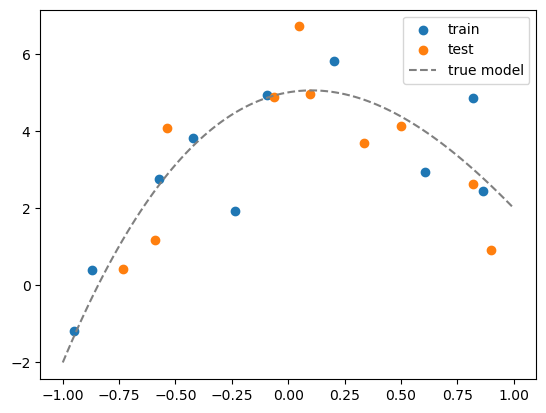

In [9]:
from sklearn.model_selection import train_test_split

# generate N data, this is the whole population
N = 20
x = np.random.uniform(-1,1,N)
Y = x + np.random.normal(0,0.1,N)
x = x.reshape(-1,1)


# maximum degree of the polynomial
degree = 7

# create a dataframe of all the polynomial features
X = np.hstack([x**i for i in range(degree+1)])

# convert to a pandas dataframe
df = pd.DataFrame(X, columns=['x%d'%i for i in range(degree+1)])
df.head()

# suppose the true model is a polynomial of degree 3
coeff = [5, 1, -5, 1]
df['y_true'] = sum([c*df[f'x{i}'] for i,c in enumerate(coeff)])

# add some noise to get data
df['y'] = df['y_true'] + np.random.normal(0,1,N)

# split the data into training and test sets 
df_train = df.iloc[:int(N/2)]
df_test = df.iloc[int(N/2):]

# visualize the data
plt.scatter(df_train['x1'], df_train['y'])
plt.scatter(df_test['x1'], df_test['y'])
# plot the true model
x_grid = np.linspace(-1,1,100)
y_grid = sum([c*x_grid**i for i,c in enumerate(coeff)])
plt.plot(x_grid, y_grid, color='gray', linestyle='--')
plt.legend(['train', 'test','true model'])

In [10]:
# For plotting, we need to create a grid of x values and its corresponding polynomial features
x_grid = np.linspace(-1,1,100).reshape(-1,1) 
X_grid = np.hstack([x_grid**i for i in range(degree+1)])
df_grid = pd.DataFrame(X_grid, columns=['x%d'%i for i in range(degree+1)])
df_grid.head()

,x0,x1,x2,x3,x4,x5,x6,x7
0,1.0,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000
1,1.0,-0.979798,0.960004,-0.940610,0.921608,-0.902989,0.884747,-0.866874
2,1.0,-0.959596,0.920824,-0.883619,0.847918,-0.813658,0.780783,-0.749236
3,1.0,-0.939394,0.882461,-0.828978,0.778737,-0.731541,0.687205,-0.645557
4,1.0,-0.919192,0.844914,-0.776638,0.713879,-0.656192,0.603166,-0.554426


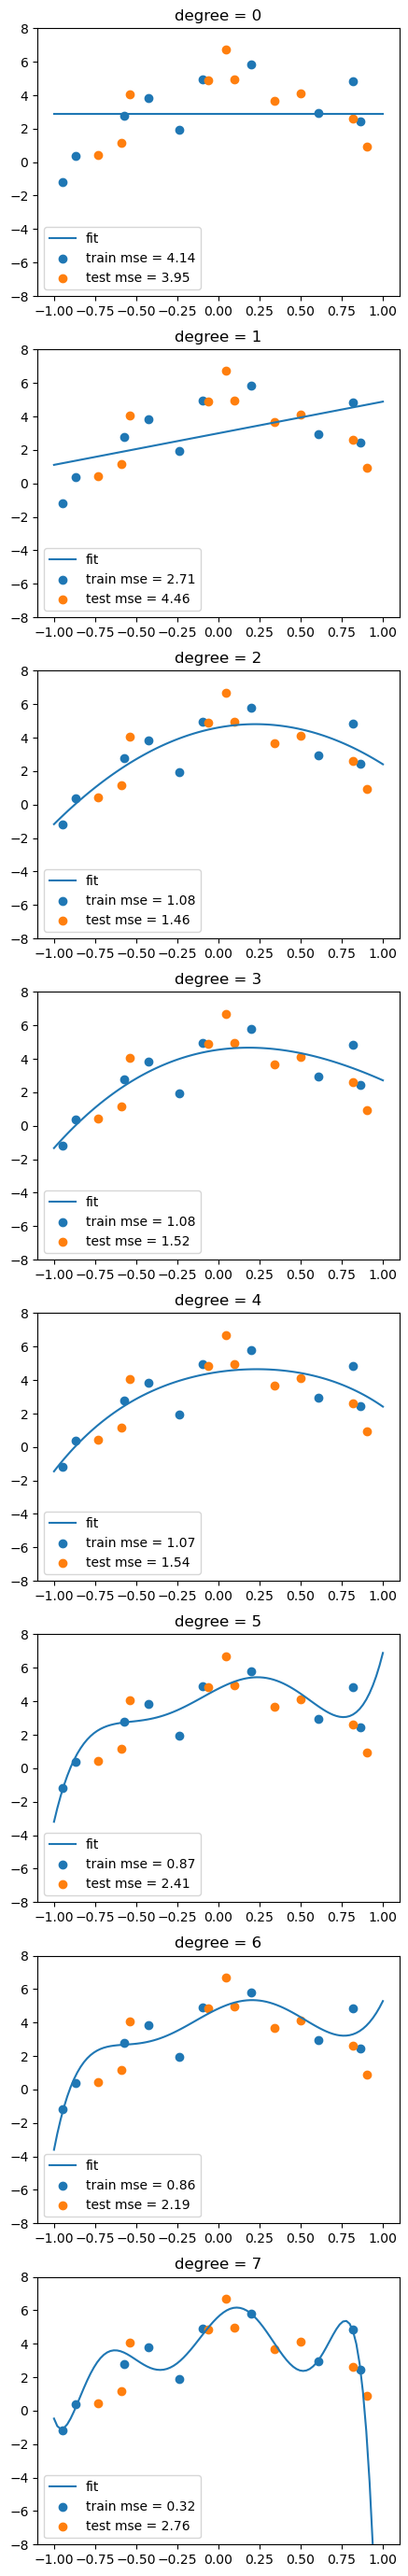

In [11]:
# for each degree, fit a polynomial model
from sklearn.metrics import mean_squared_error

# our features already include the constant term
lreg = linear_model.LinearRegression(fit_intercept=False)

train_mse = []
test_mse = []

fig, axs = plt.subplots(degree+1, 1, figsize=(5,degree*5))

# fit a polynomial model for each degree
for d in range(degree+1):

    # fit the model
    Xtrain_poly = df_train.iloc[:,:d+1]
    Xtest_poly = df_test.iloc[:,:d+1]
    
    lreg.fit(Xtrain_poly, df_train['y'])

    # calculate the MSE on training and test sets
    train_mse.append(mean_squared_error(df_train['y'], lreg.predict(Xtrain_poly)))
    test_mse.append(mean_squared_error(df_test['y'], lreg.predict(Xtest_poly)))

    # visualize the fit
    y_grid = lreg.predict(df_grid.iloc[:,:d+1])
    axs[d].plot(x_grid, y_grid)
    axs[d].scatter(df_train['x1'], df_train['y'])
    axs[d].scatter(df_test['x1'], df_test['y'])
    axs[d].set_title('degree = %d'%d)
    # show legend and MSE
    axs[d].legend(['fit', f'train mse = {train_mse[-1]:.2f}', f'test mse = {test_mse[-1]:.2f}'])
    axs[d].set_ylim(-8,8)


Text(0, 0.5, 'mse')

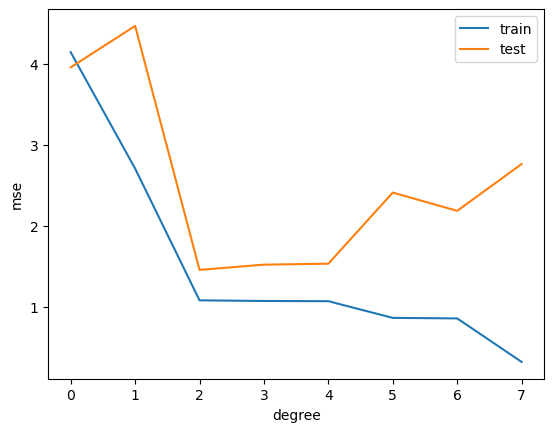

In [12]:
plt.plot(range(degree+1), train_mse)
plt.plot(range(degree+1), test_mse)
plt.legend(['train', 'test'])
plt.xticks(range(degree+1))
plt.xlabel('degree')
plt.ylabel('mse')

## Bias-Variance Tradeoff

The [bias–variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) describes the relationship between a model's complexity, the accuracy of its predictions, and how well it can generalize to new data.

![tradeoff](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Bias_and_variance_contributing_to_total_error.svg/2880px-Bias_and_variance_contributing_to_total_error.svg.png)

In general, as we increase the number of tunable parameters in a model, such as the degree of the polynomial, the model becomes more flexible and can better fit the training data. It is said to have lower bias. However, more flexible model is also better at fitting the noise. Each time we draw a different batch of training data, the model will fit these data differently, and there is greater variance in the model's estimated parameters.

## Training, validation, and test data sets

Note that we have the following separate goals:

- Model selection: estimate the performance of different models in order to choose the best one.
- Model assessment: after choosing the best model, estimate its prediction error on new data.

If we have plenty of data, we can split it into three sets: training, validation, and test. 

The training set is used to fit the models. 
The validation set is used to estimate prediction error, which is used to select the model or tune the hyperparameters. In our example, this is the degree of the polynomial. Notice that in the process, the models "see" the validation set.
The test set is used for assessment of the generalization error of the final chosen model. This set is never seen by the models. We should not go back and choose the model based on the test set performance.
